In [1]:
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
import requests
import json
import os

from datetime import date, timedelta
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
from newsapi import NewsApiClient


In [2]:
# Set APIs keys
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
news_api_key = os.getenv("NEWS_API_KEY")

In [3]:
#Getting ticker to evaluate 
tickers = input("Enter the stock to evaluate: ") 

def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)

    result = requests.get(url).json()

    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

company = get_symbol(f"{tickers}")

print(f"You entered {tickers}: {company}. Let's evaluate it...") 

Enter the stock to evaluate:  MSFT


You entered MSFT: Microsoft Corporation. Let's evaluate it...


In [4]:
today = date.today()
previous_month_date = date.today() - timedelta(30)
newsapi = NewsApiClient(api_key=f"{news_api_key}")
all_articles = newsapi.get_everything(q=f"{company}",
                                      from_param=today,
                                      to=previous_month_date,
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=5,
                                      page=1
                                     )
#print(json.dumps(all_articles, indent=4))

In [5]:
article_title = all_articles["articles"][0]["title"]
print(article_title)
article_link= all_articles["articles"][0]["url"]
print(article_link)
print("\n")

article_title = all_articles["articles"][1]["title"]
print(article_title)
article_link= all_articles["articles"][1]["url"]
print(article_link)
print("\n")

article_title = all_articles["articles"][2]["title"]
print(article_title)
article_link= all_articles["articles"][2]["url"]
print(article_link)
print("\n")

article_title = all_articles["articles"][3]["title"]
print(article_title)
article_link= all_articles["articles"][3]["url"]
print(article_link)
print("\n")

article_title = all_articles["articles"][4]["title"]
print(article_title)
article_link= all_articles["articles"][4]["url"]
print(article_link)
print("\n")

The Out-of-Touch Adults' Guide to Kid Culture: Sweater Weather Edition
https://lifehacker.com/the-out-of-touch-adults-guide-to-kid-culture-sweater-w-1845524435


Former Google CEO Eric Schmidt jumped to the company's defense as it faces a landmark antitrust lawsuit: 'There's a difference between dominance and excellence' (GOOGL)
https://www.businessinsider.com/eric-schmidt-defends-google-against-justice-department-lawsuit-2020-10


Microsoft, IBM, Nvidia, and others released an open framework to help security analysts detect, counter, and remediate threats against machine learning systems (Kyle Wiggers/VentureBeat)
https://www.techmeme.com/201022/p35


Here are some of the best games to play in Roblox
https://www.androidcentral.com/best-games-play-roblox


Multi-Agent Resource Optimization (MARO) Platform
https://github.com/microsoft/maro




In [6]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [7]:
timeframe ='1D'
start_date = pd.Timestamp("2011-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp(today, tz="America/New_York").isoformat()

In [8]:
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [9]:
df_ticker.head()

MSFT                               
                            open   high    low  close    volume
2011-01-03 00:00:00-05:00  28.03  28.18  27.92  27.97  47397004
2011-01-04 00:00:00-05:00  27.94  28.17  27.85  28.05  48670848
2011-01-05 00:00:00-05:00  27.91  28.01  27.77  28.00  54570200
2011-01-06 00:00:00-05:00  28.04  28.85  27.86  28.81  81837543
2011-01-07 00:00:00-05:00  28.65  28.74  28.25  28.59  64874440

In [10]:
MC_ticker = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [11]:
MC_ticker.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.969699,0.987578,0.978730,0.994971,0.974085,1.008369,1.018609,0.971723,1.021318,0.991030,...,1.002798,1.023428,1.001336,0.988680,1.003021,1.006059,0.981220,0.986531,0.981962,0.997828
2,0.938226,0.986345,0.995829,1.003012,0.995901,1.015790,1.014258,0.977626,1.021990,0.981956,...,1.017485,1.012984,0.994219,0.999900,1.015886,1.022820,0.971772,0.997160,1.003073,1.035416
3,0.941426,0.978443,1.015065,1.020082,0.992511,1.015500,1.004681,1.001169,1.026021,0.990813,...,1.041229,1.020731,0.995968,0.994499,1.043555,1.030481,0.977879,0.995607,1.020478,1.018646
4,0.956126,0.945238,1.010109,0.998320,0.994415,1.026429,1.004473,1.000527,1.015937,0.971181,...,1.028566,1.034414,0.996151,0.988993,1.027421,1.030121,0.971959,1.006307,0.992794,1.019843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.009289,4.030243,1.982537,4.943680,10.356054,1.856578,10.222738,11.539646,0.997086,1.783476,...,1.957206,7.620528,3.028026,6.275944,2.612949,7.978716,3.893740,2.505330,1.859697,4.127367
1257,1.015944,4.052758,1.984455,5.132084,10.169249,1.848936,9.944130,11.404429,1.005334,1.766063,...,1.915819,7.739099,3.015056,6.357885,2.580399,7.682938,3.883475,2.420105,1.860288,4.130473
1258,0.994715,4.146800,1.964214,5.210634,10.085411,1.850317,9.755092,11.160267,0.982397,1.778589,...,1.952876,7.580773,3.052857,6.218980,2.471660,7.865204,3.890974,2.414555,1.829976,4.128320
1259,0.972557,4.210687,1.962397,5.163413,9.887026,1.869592,9.652898,11.483450,0.960450,1.751927,...,1.962719,7.527694,2.952493,6.200738,2.403065,7.845937,3.979085,2.398829,1.843039,4.108836


In [12]:
ticker_tbl = MC_ticker.summarize_cumulative_return()
print(ticker_tbl)

count           1000.000000
mean               3.351201
std                2.092437
min                0.363589
25%                1.936140
50%                2.850387
75%                4.145669
max               16.384333
95% CI Lower       0.882873
95% CI Upper       8.942711
Name: 1260, dtype: float64


In [13]:
# Set initial investment
initial_investment = 1

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(ticker_tbl[8]*initial_investment,2)
ci_upper = round(ticker_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that a dollar invested in {company}"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that a dollar invested in Microsoft Corporation over the next 5 years will end within in the range of $0.88 and $8.94


In [14]:
df_spy = api.get_barset(
    'SPY',
    timeframe,
    start=start_date,
    end=end_date
).df
df_spy.head()

SPY                                    
                             open     high     low   close     volume
2011-01-03 00:00:00-05:00  126.71  127.600  126.66  127.05  111998202
2011-01-04 00:00:00-05:00  127.33  127.370  126.19  126.93  118272689
2011-01-05 00:00:00-05:00  126.57  127.725  126.46  127.63   99250724
2011-01-06 00:00:00-05:00  127.69  127.830  127.01  127.39   97812619
2011-01-07 00:00:00-05:00  127.56  127.770  126.15  127.12  130080614

In [15]:
df_dia = api.get_barset(
    'DIA',
    timeframe,
    start=start_date,
    end=end_date
).df
df_dia.head()

DIA                                 
                             open    high     low   close   volume
2011-01-03 00:00:00-05:00  116.39  116.86  116.36  116.41  7916902
2011-01-04 00:00:00-05:00  116.71  116.73   97.90   98.02  8404859
2011-01-05 00:00:00-05:00   97.90  117.19   97.76  117.01  7550727
2011-01-06 00:00:00-05:00  117.14  117.19   98.01   98.14  4960134
2011-01-07 00:00:00-05:00   98.26  116.61   97.64  116.56  8775951

In [16]:
df_compare = pd.concat([df_ticker, df_spy, df_dia], axis="columns", join="inner")
df_compare.head()

MSFT                                    SPY  \
                            open   high    low  close    volume    open   
2011-01-03 00:00:00-05:00  28.03  28.18  27.92  27.97  47397004  126.71   
2011-01-04 00:00:00-05:00  27.94  28.17  27.85  28.05  48670848  127.33   
2011-01-05 00:00:00-05:00  27.91  28.01  27.77  28.00  54570200  126.57   
2011-01-06 00:00:00-05:00  28.04  28.85  27.86  28.81  81837543  127.69   
2011-01-07 00:00:00-05:00  28.65  28.74  28.25  28.59  64874440  127.56   

                                                                  DIA          \
                              high     low   close     volume    open    high   
2011-01-03 00:00:00-05:00  127.600  126.66  127.05  111998202  116.39  116.86   
2011-01-04 00:00:00-05:00  127.370  126.19  126.93  118272689  116.71  116.73   
2011-01-05 00:00:00-05:00  127.725  126.46  127.63   99250724   97.90  117.19   
2011-01-06 00:00:00-05:00  127.830  127.01  127.39   97812619  117.14  117.19   
2011-01-07 00:00:00-05:00  127.770  126.15  127.12  130080614   98.26  116.61   

                                                    
                              low   close   volume  
2011-01-03 00:00:00-05:00  116.36  116.41  7916902  
2011-01-04 00:00:00-05:00   97.90   98.02  8404859  
2011-01-05 00:00:00-05:00   97.76  117.01  7550727  
2011-01-06 00:00:00-05:00   98.01   98.14  4960134  
2011-01-07 00:00:00-05:00   97.64  116.56  8775951

In [17]:
df_close = df_compare.xs('close',level=1,axis=1)
df_close.head()

,MSFT,SPY,DIA
2011-01-03 00:00:00-05:00,27.97,127.05,116.41
2011-01-04 00:00:00-05:00,28.05,126.93,98.02
2011-01-05 00:00:00-05:00,28.00,127.63,117.01
2011-01-06 00:00:00-05:00,28.81,127.39,98.14
2011-01-07 00:00:00-05:00,28.59,127.12,116.56


In [18]:
df_return = df_close.pct_change()
df_return.dropna(inplace=True)
df_return.head()

,MSFT,SPY,DIA
2011-01-04 00:00:00-05:00,0.002860,-0.000945,-0.157976
2011-01-05 00:00:00-05:00,-0.001783,0.005515,0.193736
2011-01-06 00:00:00-05:00,0.028929,-0.001880,-0.161268
2011-01-07 00:00:00-05:00,-0.007636,-0.002119,0.187691
2011-01-10 00:00:00-05:00,-0.013291,-0.001101,-0.162234


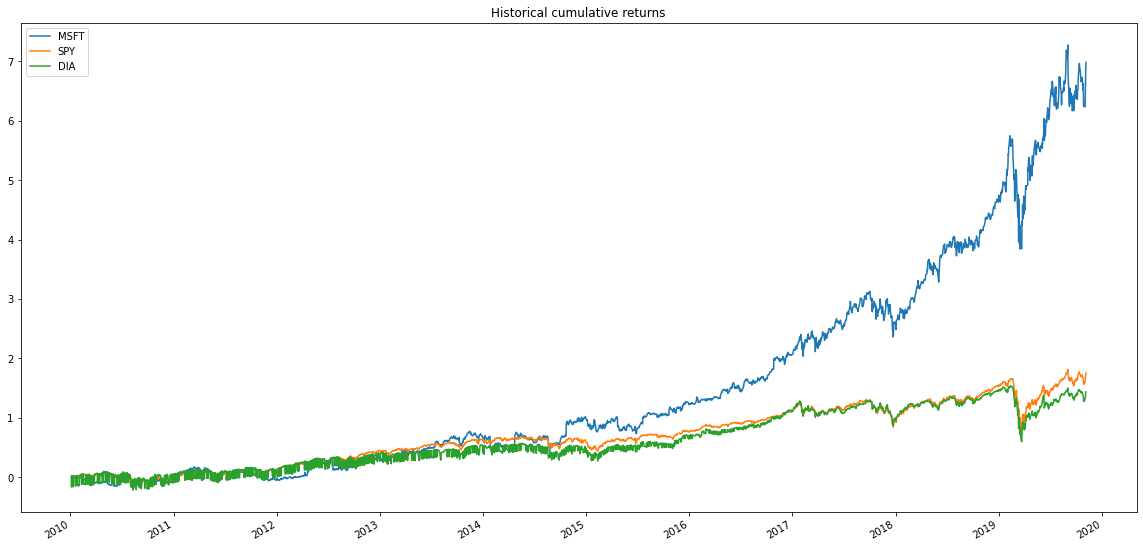

In [19]:
df_cumreturn = (1+ df_return).cumprod()-1
df_cumreturn.plot(
    title="Historical cumulative returns",
    figsize=(20,10)
)

In [20]:
df_correlation = df_return.corr()
df_correlation

,MSFT,SPY,DIA
MSFT,1.000000,0.751572,0.116058
SPY,0.751572,1.000000,0.176268
DIA,0.116058,0.176268,1.000000


In [21]:
df_sharpe = (df_return.mean() * 252) / (df_return.std() * np.sqrt(252))
df_sharpe

MSFT    0.946351
SPY     0.678229
DIA     0.576084
dtype: float64

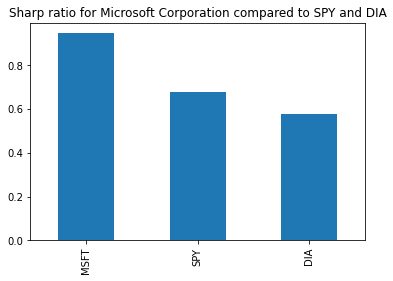

In [22]:
df_sharpe.plot(
    kind="bar",
    title=f"Sharp ratio for {company} compared to SPY and DIA"
)
